In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

In [225]:
df1 = pd.read_excel('/Users/minseok/Desktop/교육 EDA/패널csv데이터/패널_1학년대학생활_데이터_필터.xlsx')
df2 = pd.read_excel('/Users/minseok/Desktop/교육 EDA/패널csv데이터/패널_2학년대학생활_데이터_필터.xlsx')
df3 = pd.read_excel('/Users/minseok/Desktop/교육 EDA/패널csv데이터/패널_3학년대학생활_데이터_필터.xlsx')
df4 = pd.read_excel('/Users/minseok/Desktop/교육 EDA/패널csv데이터/패널_4학년대학생활_데이터_필터.xlsx')

In [226]:
import matplotlib.pyplot as plt
from matplotlib import rc  
rc('font', family='AppleGothic') 			 
plt.rcParams['axes.unicode_minus'] = False  

In [227]:
code_df = pd.read_excel('/Users/minseok/Desktop/교육 EDA/패널csv데이터/대학생활 코드북.xlsx')
code_df[:10]

,변수명,변수 설명,변수값,Unnamed: 3,변수 추가한 회차,비고
0,y**a029,학교 소재지(시군구),NaN,오픈코드 참조,NaN,NaN
1,y**a029,학교 소재지(시군구),9090908.0,응답거절,NaN,NaN
2,y**a029,학교 소재지(시군구),9090909.0,모름,NaN,NaN
3,y**a029z,학교 소재지(16개 시도),NaN,오픈코드 참조,NaN,생성변수
4,y**a031,대학교유형,NaN,NaN,NaN,NaN
5,y**a031,대학교유형,1.0,일반 4년제 대학,NaN,NaN
6,y**a031,대학교유형,2.0,2~3년제 대학,NaN,NaN
7,y**a031,대학교유형,3.0,산업대학,NaN,NaN
8,y**a031,대학교유형,4.0,교육대학,NaN,NaN
9,y**a031,대학교유형,5.0,방송통신대학,NaN,NaN


In [228]:
df1.head()

,sampid,취직년도,취직시 설문차수,취직1년후 직장 인간관계,1학년 년도,학교 소재지(시군구),학교 소재지(16개 시도),대학교유형,전공계열,현재학년,...,아르바이트 경험여부,아르바이트 횟수,아르바이트 종류 [1],주당평균 근로일수 [1],하루평균 근로시간 [1],아르바이트 임금 (만원) [1],아르바이트 이유 [1],아르바이트 추천여부 [1],아르바이트 영향 [1],취직1년후 직장 인간관계 그룹
0,12,2014,8,3,2007,901.0,9.0,1.0,2.0,1,...,1.0,1.0,1.0,7.0,9.0,84.0,3.0,2.0,1.0,medium
1,13,2013,7,3,2011,901.0,9.0,2.0,6.0,1,...,1.0,1.0,8.0,6.0,8.0,0.5,3.0,NaN,2.0,medium
2,14,2016,10,3,2007,902.0,9.0,1.0,2.0,1,...,1.0,1.0,7.0,2.0,10.0,3.0,6.0,1.0,3.0,medium
3,19,2010,4,3,2007,903.0,9.0,NaN,NaN,1,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium
4,21,2015,9,3,2009,1113.0,11.0,1.0,4.0,1,...,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,medium


In [229]:
code_co2 = ['a045', 'a041', 'a362', 'a254', 'a249', 'a264', 'a039', 'a075']
code_co3 = ['a245', 'a043', 'a065', 'a046', 'a059']

In [230]:
for col in code_df['변수명'].unique():
    if col[3:] in code_co2:
        print(code_df[code_df['변수명'] == col]['변수 설명'].unique())

['학교생활 만족도1 - 전반적 만족도']
['학교생활 만족도3 - 수업내용']
['학교생활 만족도7 - 특별활동']
['전과여부']
['스펙이 취업에 미치는 영향1 - 학점         ']
['<학생> 취업희망기업']
['<학생> 직업선택시 중요도3 - 개인지향']
['<학생> 직업선택시 중요도13 - 자율']


In [231]:
for col in code_df['변수명'].unique():
    if col[3:] in code_co3:
        print(code_df[code_df['변수명'] == col]['변수 설명'].unique())

['학교생활 만족도5 - 교수진 및 (담임)선생님']
['학교생활 만족도8 - 취업가능성']
['전반적 학교성적']
['학점평균']
['<학생> 희망직업코드']


In [232]:
# 변수 설정
dependent_var = '취직1년후 직장 인간관계'
independent_vars = [
'학교생활 만족도7 - 특별활동',
'학교생활 만족도3 - 수업내용',
'스펙이 취업에 미치는 영향1 - 학점         ',
'<학생> 직업선택시 중요도3 - 개인지향',
'<학생> 취업희망기업',
'<학생> 직업선택시 중요도13 - 자율',
'학교생활 만족도1 - 전반적 만족도',
'전과여부',
'학교생활 만족도5 - 교수진 및 (담임)선생님',
'학점평균',
'학교생활 만족도8 - 취업가능성',
'전반적 학교성적']



In [233]:
data = df4[[dependent_var] + independent_vars]
# 종속변수 변환 (1, 2, 3 -> 0, 4, 5 -> 1)
data[dependent_var] = data[dependent_var].apply(lambda x: 0 if x in [1, 2, 3] else 1)
# 결측치 및 무한대 값 처리
data = data.replace([np.inf, -np.inf], np.nan)
data = data.dropna()

/var/folders/57/xqkrfyns05g_qg0m9mx6j6rh0000gn/T/ipykernel_30494/257037056.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[dependent_var] = data[dependent_var].apply(lambda x: 0 if x in [1, 2, 3] else 1)


In [234]:
for col in independent_vars:
    print(df4[col].value_counts())

학교생활 만족도7 - 특별활동
3.0    886
4.0    813
2.0    128
5.0    121
1.0     28
Name: count, dtype: int64
학교생활 만족도3 - 수업내용
4.0    1179
3.0     589
5.0     127
2.0      77
1.0      12
Name: count, dtype: int64
스펙이 취업에 미치는 영향1 - 학점         
4.0    281
3.0    119
5.0     37
2.0     23
1.0      5
Name: count, dtype: int64
<학생> 직업선택시 중요도3 - 개인지향
4.0    627
3.0    625
2.0    271
5.0    142
1.0     36
Name: count, dtype: int64
<학생> 취업희망기업
1.0    628
2.0    607
4.0    166
5.0    146
3.0     91
6.0     57
7.0      6
Name: count, dtype: int64
<학생> 직업선택시 중요도13 - 자율
4.0    1075
3.0     332
5.0     263
2.0      29
1.0       4
Name: count, dtype: int64
학교생활 만족도1 - 전반적 만족도
4.0    1280
3.0     546
5.0      91
2.0      57
1.0      10
Name: count, dtype: int64
전과여부
2.0    1968
1.0      25
Name: count, dtype: int64
학교생활 만족도5 - 교수진 및 (담임)선생님
4.0    1188
3.0     568
5.0     142
2.0      73
1.0      13
Name: count, dtype: int64
학점평균
2.0    1160
1.0     664
3.0     144
4.0       5
Name: count, dtype: int64
학교생활 만족도8

In [235]:
data['<학생> 취업희망기업'].value_counts()

<학생> 취업희망기업
1.0    177
2.0    157
4.0     44
3.0     40
5.0     31
6.0     14
Name: count, dtype: int64

In [236]:
data['<학생> 취업희망기업'] = data['<학생> 취업희망기업'].apply(lambda x: 0 if x in [1, 2, 3] else (1 if x in [4, 5] else 2))

In [237]:
data['<학생> 취업희망기업'].value_counts()

<학생> 취업희망기업
0    374
1     75
2     14
Name: count, dtype: int64

In [238]:
data['학점평균'].value_counts()

학점평균
2.0    278
1.0    149
3.0     35
4.0      1
Name: count, dtype: int64

In [239]:
data['학점평균'] = data['학점평균'].apply(lambda x: 1 if x ==4 else (2 if x == 3  else (3 if x ==2 else 4)))

In [240]:
data['학점평균'].value_counts()

학점평균
3    278
4    149
2     35
1      1
Name: count, dtype: int64

In [241]:
from sklearn.preprocessing import OneHotEncoder

# OneHotEncoder 객체를 생성합니다.
encoder = OneHotEncoder(drop='first', sparse_output=False)

# '학생 취업희망기업' 열을 인코딩합니다.
encoded_features = encoder.fit_transform(data[['<학생> 취업희망기업']])
encoded_feature_names = encoder.get_feature_names_out(['<학생> 취업희망기업'])


In [243]:
numeric_cols = [
'학교생활 만족도7 - 특별활동',
'학교생활 만족도3 - 수업내용',
'스펙이 취업에 미치는 영향1 - 학점         ',
'<학생> 직업선택시 중요도3 - 개인지향',
'<학생> 직업선택시 중요도13 - 자율',
'학교생활 만족도1 - 전반적 만족도',
'전과여부',
'학교생활 만족도5 - 교수진 및 (담임)선생님',
'학점평균',
'학교생활 만족도8 - 취업가능성',
'전반적 학교성적']
X = np.hstack([data[numeric_cols].values, encoded_features])
X = sm.add_constant(X)  # 상수항 추가
y = data['취직1년후 직장 인간관계']

In [244]:
print(len(numeric_cols), len(encoded_feature_names))

11 2


In [245]:
from re import A
def calc_vif(df):
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    vif = pd.DataFrame()
    vif["variables"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return(vif)


#a=calc_vif(x)
#a=calc_vif(x.iloc[:,2:])
#a=calc_vif(x.iloc[:,2:-1])
a=calc_vif(pd.DataFrame(X))
a

,variables,VIF
0,0,524.501995
1,1,1.323588
2,2,1.838537
3,3,1.078360
4,4,1.095657
5,5,1.101934
6,6,1.995090
7,7,1.034821
8,8,1.980786
9,9,2.425891


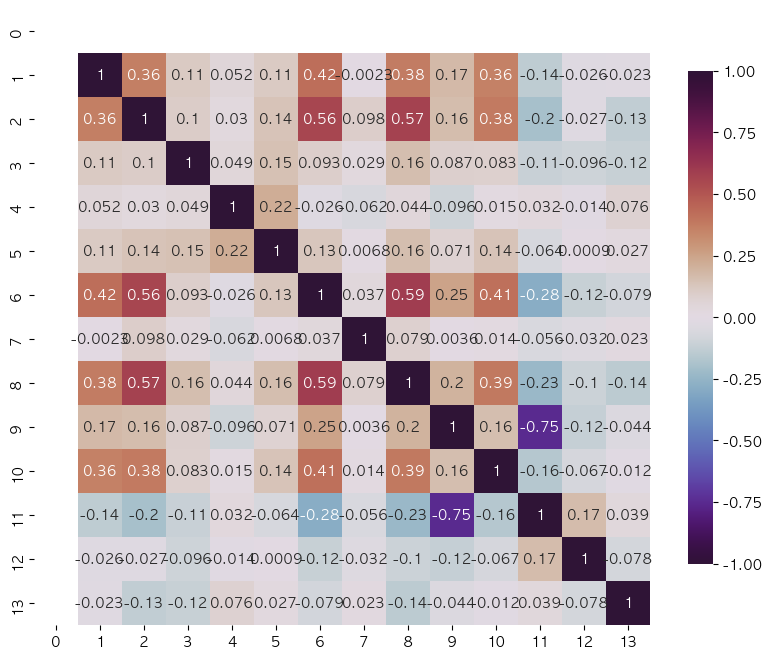

In [246]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = pd.DataFrame(X).corr(method='spearman')
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=bool),  cmap="twilight_shifted", vmin=-1, vmax=1,
            square=True, ax=ax, cbar_kws={"shrink": 0.8})

plt.show()

학점평균 vs 전반적 성적 중 학점평균 선택

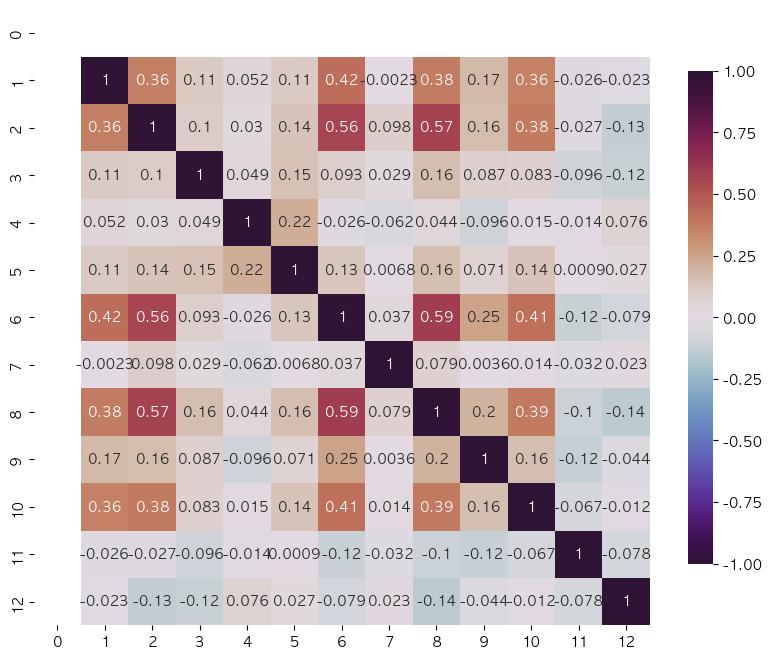

In [247]:
numeric_cols2 = [
'학교생활 만족도7 - 특별활동',
'학교생활 만족도3 - 수업내용',
'스펙이 취업에 미치는 영향1 - 학점         ',
'<학생> 직업선택시 중요도3 - 개인지향',
'<학생> 직업선택시 중요도13 - 자율',
'학교생활 만족도1 - 전반적 만족도',
'전과여부',
'학교생활 만족도5 - 교수진 및 (담임)선생님',
'학점평균',
'학교생활 만족도8 - 취업가능성',]
X = np.hstack([data[numeric_cols2].values, encoded_features])
X = sm.add_constant(X)  # 상수항 추가
y = data['취직1년후 직장 인간관계']

import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = pd.DataFrame(X).corr(method='spearman')
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=bool),  cmap="twilight_shifted", vmin=-1, vmax=1,
            square=True, ax=ax, cbar_kws={"shrink": 0.8})

plt.show()

'학교생활 만족도1 - 전반적 만족도' 제거

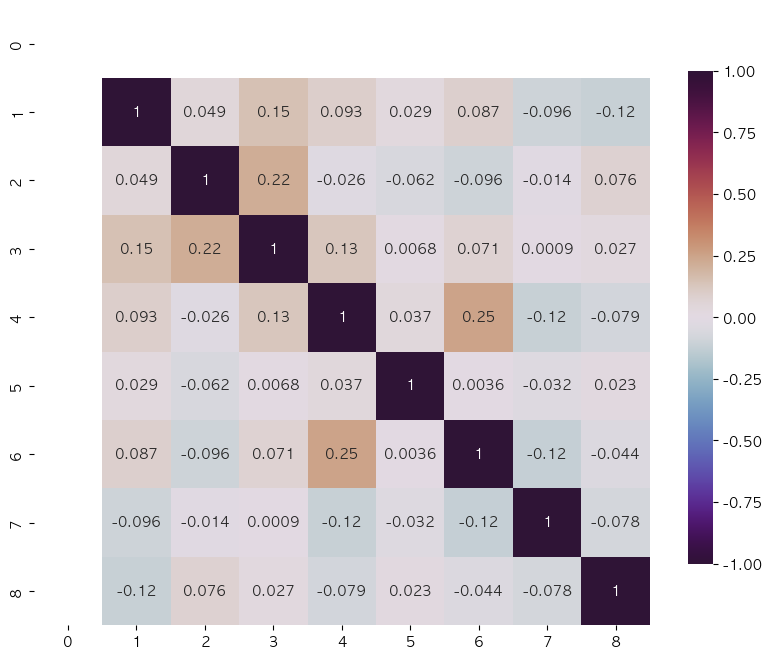

In [248]:
numeric_cols3 = [
'스펙이 취업에 미치는 영향1 - 학점         ',
'<학생> 직업선택시 중요도3 - 개인지향',
'<학생> 직업선택시 중요도13 - 자율',
'학교생활 만족도1 - 전반적 만족도',
'전과여부',
'학점평균',
]
X = np.hstack([data[numeric_cols3].values, encoded_features])
X = sm.add_constant(X)  # 상수항 추가
y = data['취직1년후 직장 인간관계']

import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = pd.DataFrame(X).corr(method='spearman')
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=bool),  cmap="twilight_shifted", vmin=-1, vmax=1,
            square=True, ax=ax, cbar_kws={"shrink": 0.8})

plt.show()

In [249]:
# 로지스틱 회귀 모델 학습
model = sm.Logit(y, X)
result = model.fit()

#결과 요약 출력 (p-value 포함)
print(result.summary(xname= ['const'] + data[numeric_cols3].columns.tolist() + encoded_feature_names.tolist()))

Optimization terminated successfully.
         Current function value: 0.607460
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:          취직1년후 직장 인간관계   No. Observations:                  463
Model:                          Logit   Df Residuals:                      454
Method:                           MLE   Df Model:                            8
Date:                Sun, 04 Aug 2024   Pseudo R-squ.:                 0.04261
Time:                        13:11:12   Log-Likelihood:                -281.25
converged:                       True   LL-Null:                       -293.77
Covariance Type:            nonrobust   LLR p-value:                  0.001532
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                            -5.8299      1.880     -3.101      0.

In [266]:
data2= df4[[dependent_var] + independent_vars]
# 종속변수 변환 (1, 2, 3 -> 0, 4, 5 -> 1)
#data2[dependent_var] = data2[dependent_var].apply(lambda x: 0 if x in [1, 2, 3] else 1)
# 결측치 및 무한대 값 처리
data2 = data2.replace([np.inf, -np.inf], np.nan)
data2 = data2.dropna()
data2['<학생> 취업희망기업'] = data2['<학생> 취업희망기업'].apply(lambda x: 0 if x in [1, 2, 3] else (1 if x in [4, 5] else 2))
data2['학점평균'] = data2['학점평균'].apply(lambda x: 1 if x ==4 else (2 if x == 3  else (3 if x ==2 else 4)))

encoder = OneHotEncoder(drop='first', sparse_output=False)

# '학생 취업희망기업' 열을 인코딩합니다.
encoded_features = encoder.fit_transform(data2[['<학생> 취업희망기업']])
encoded_feature_names = encoder.get_feature_names_out(['<학생> 취업희망기업'])

In [267]:
x2 = data2[independent_vars]
y2 = data2[dependent_var]

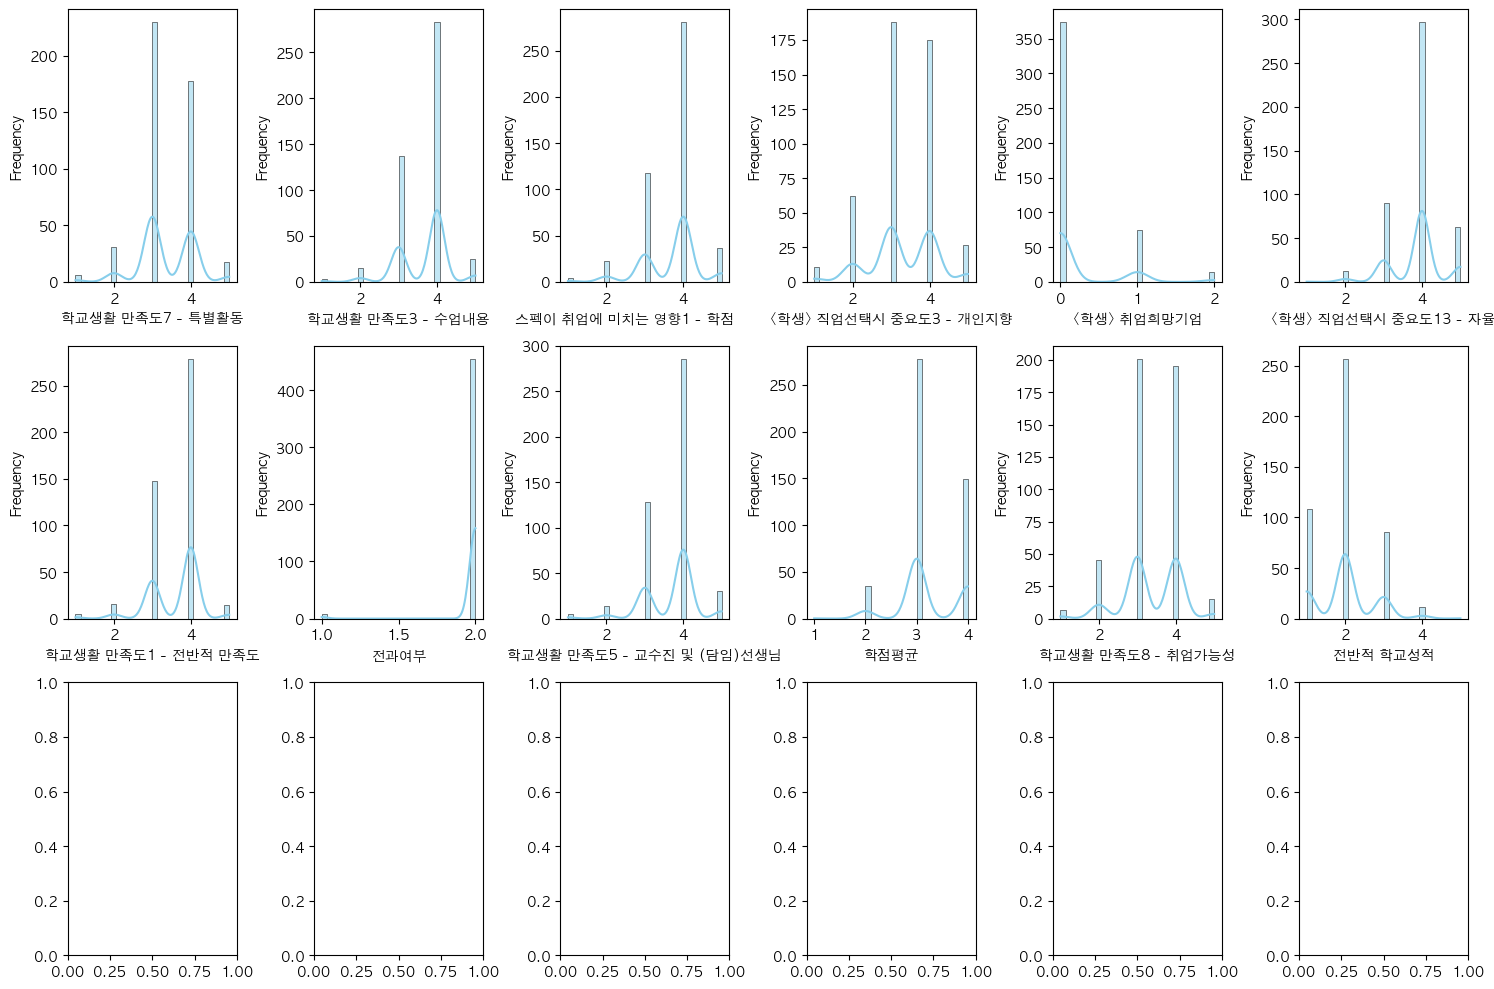

In [268]:
fig, axes = plt.subplots(3, 6, figsize=(15, 10))

for column, ax in zip(x2, axes.flatten()):
        sns.histplot(data=x2, x=column, kde=True, bins=30, color='skyblue', ax=ax)
        #ax.set_title(f'Distribution of {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')
        

plt.tight_layout()
plt.show()

/var/folders/57/xqkrfyns05g_qg0m9mx6j6rh0000gn/T/ipykernel_30494/953693985.py:2: UserWarning: 
The palette list has fewer values (10) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.boxplot(x2, palette=pastel_palette)


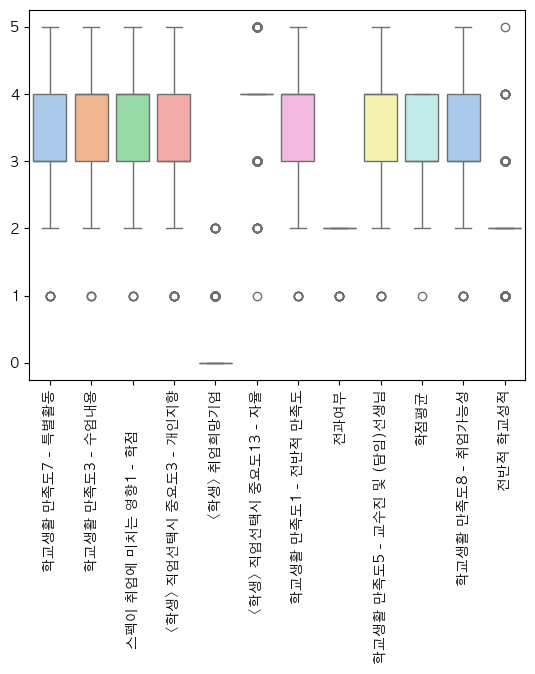

In [269]:
pastel_palette = sns.color_palette("pastel", as_cmap=True)
sns.boxplot(x2, palette=pastel_palette)
plt.xticks(rotation = 90)
plt.show()

In [270]:
from scipy.stats import shapiro
import pandas as pd

# 각 열에 대해 샤피로-윌크 검정 수행
for column in x2.columns:
    stat, p_value = shapiro(x2[column])
    
    # 검정 통계량과 p-value 출력
    print(f'Column {column}:')
    print(f'Statistic: {stat:.4f}, p-value: {p_value:.4f}')
    
    # p-value에 따라 정규성 여부 판단
    alpha = 0.05
    if p_value > alpha:
        print('결과: 데이터는 정규분포를 따릅니다.\n')
    else:
        print('결과: 데이터는 정규분포를 따르지 않습니다.\n')


Column 학교생활 만족도7 - 특별활동:
Statistic: 0.8281, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column 학교생활 만족도3 - 수업내용:
Statistic: 0.7699, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column 스펙이 취업에 미치는 영향1 - 학점         :
Statistic: 0.7930, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column <학생> 직업선택시 중요도3 - 개인지향:
Statistic: 0.8781, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column <학생> 취업희망기업:
Statistic: 0.5003, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column <학생> 직업선택시 중요도13 - 자율:
Statistic: 0.7847, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column 학교생활 만족도1 - 전반적 만족도:
Statistic: 0.7507, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column 전과여부:
Statistic: 0.1079, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column 학교생활 만족도5 - 교수진 및 (담임)선생님:
Statistic: 0.7699, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column 학점평균:
Statistic: 0.7509, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column 학교생활 만족도8 - 취업가능성:
Statistic: 0.8395, p-value: 0.0000
결과: 데이터는 정규분포를 따르지 않습니다.

Column 전반적 학교성적:
Statistic: 0.8233, p-value: 0

/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/Users/minseok/miniforge3/envs/exercise1/lib/python3.8/site-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vec

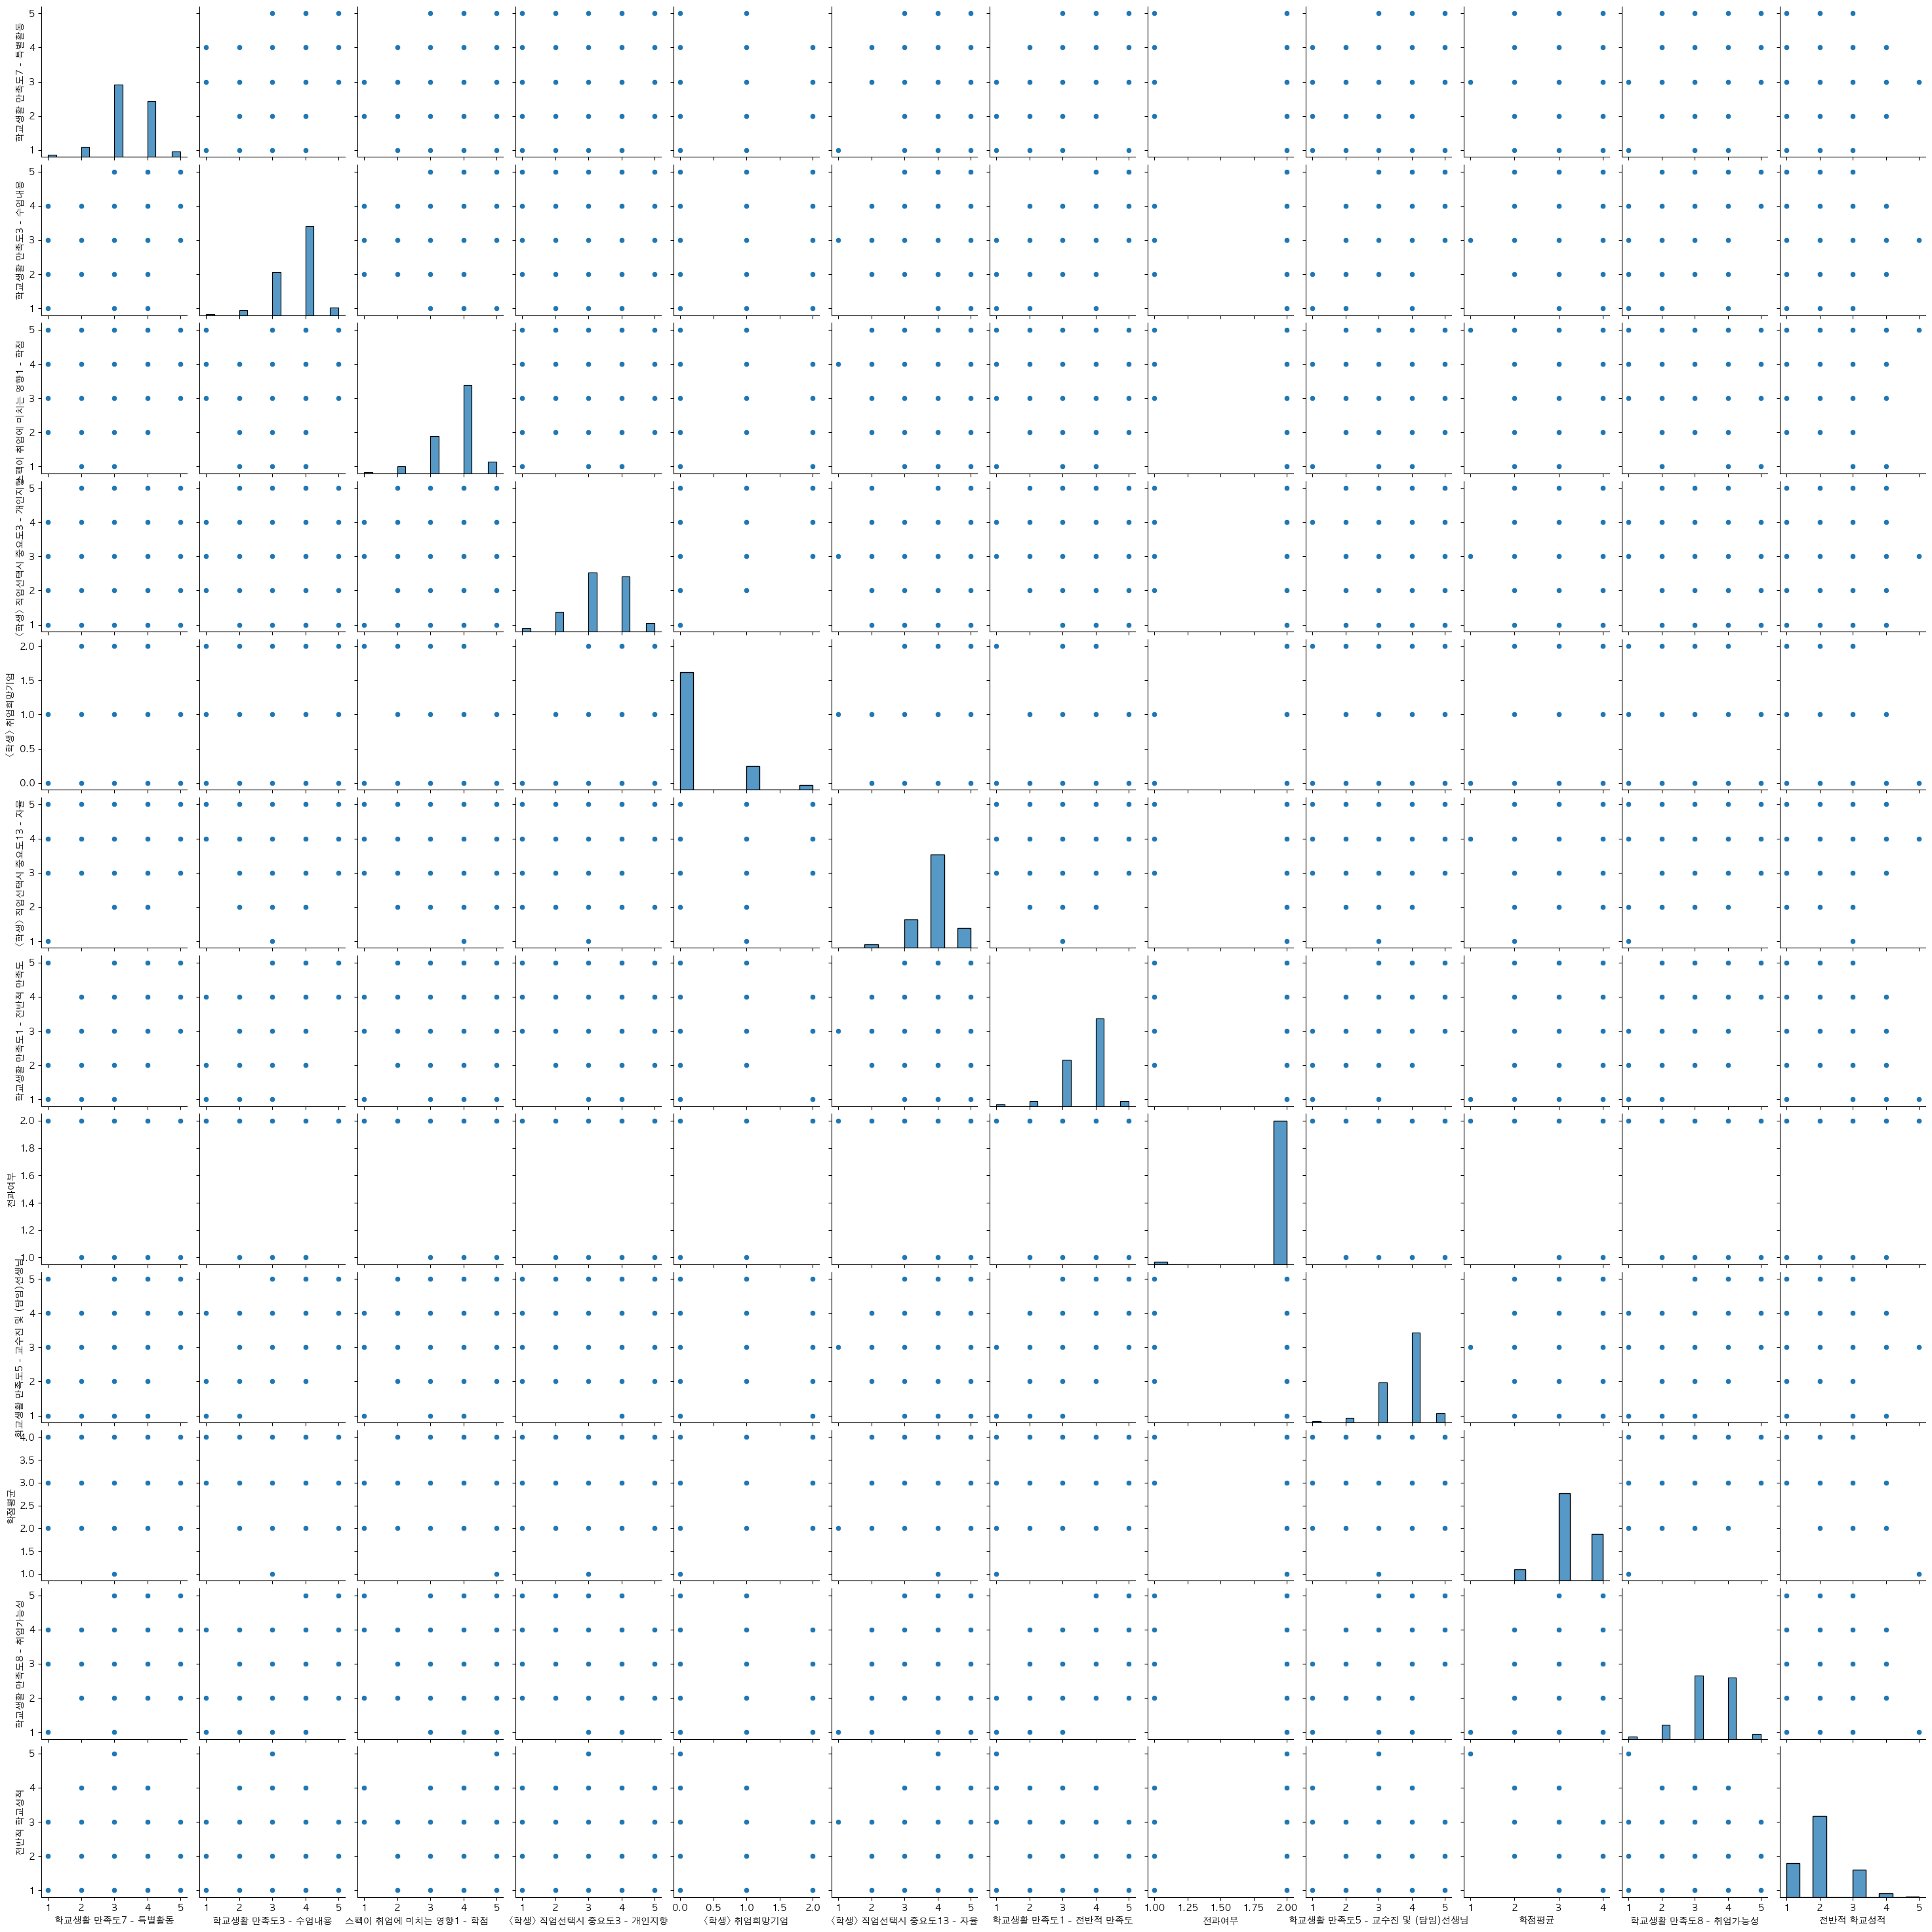

In [271]:
sns.pairplot(x2, vars=x2.columns, palette='husl')
plt.show()

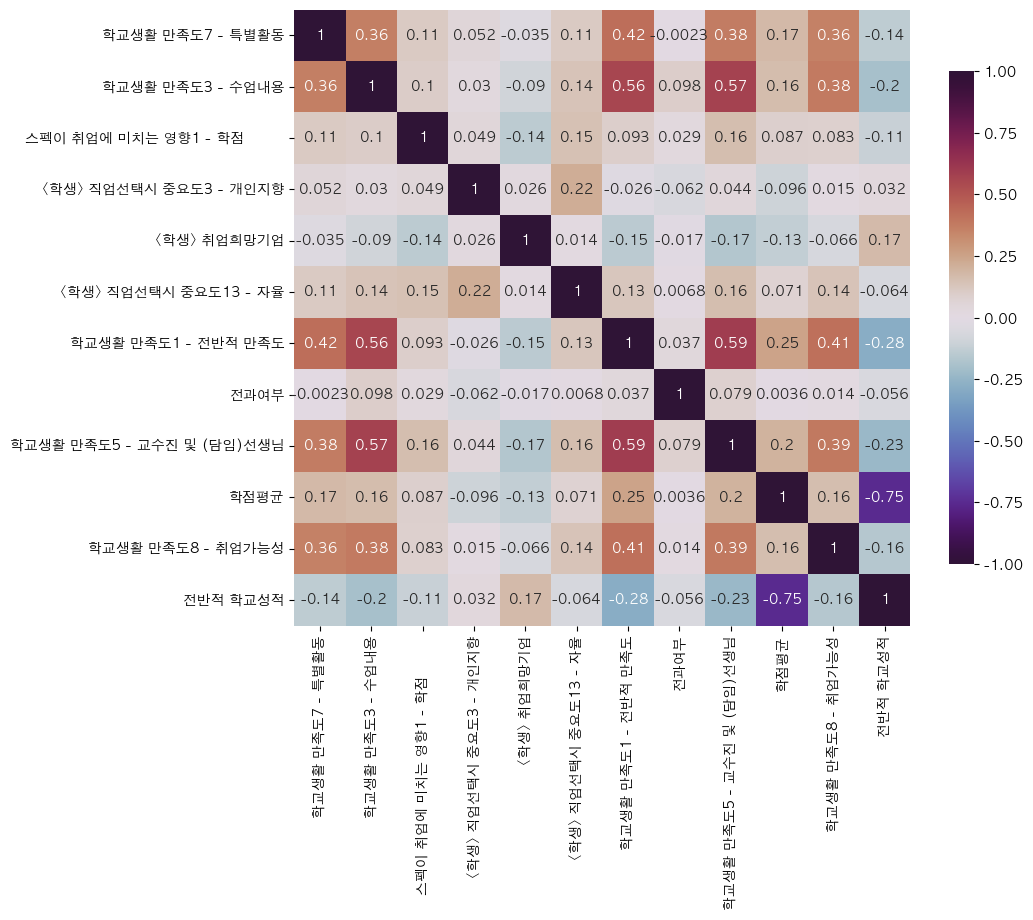

In [272]:

f, ax = plt.subplots(figsize=(10, 8))
corr = x2.corr(method='spearman')
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=bool),  cmap="twilight_shifted", vmin=-1, vmax=1,
            square=True, ax=ax, cbar_kws={"shrink": 0.8})

plt.show()

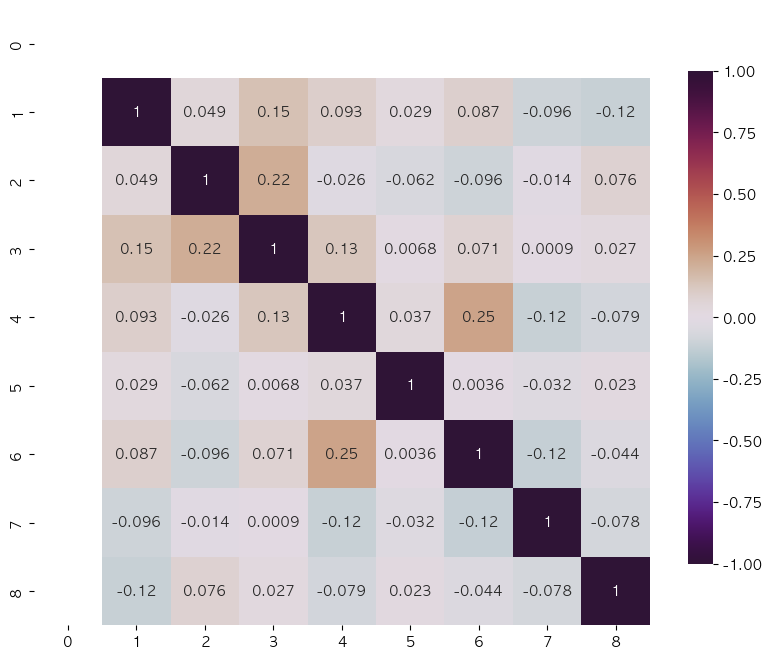

In [273]:
numeric_cols3 = [
'스펙이 취업에 미치는 영향1 - 학점         ',
'<학생> 직업선택시 중요도3 - 개인지향',
'<학생> 직업선택시 중요도13 - 자율',
'학교생활 만족도1 - 전반적 만족도',
'전과여부',
'학점평균',
]
X2 = np.hstack([data2[numeric_cols3].values, encoded_features])
X2 = sm.add_constant(X)  # 상수항 추가
y2 = data2['취직1년후 직장 인간관계']

import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = pd.DataFrame(X2).corr(method='spearman')
sns.heatmap(corr, annot=True, mask=np.zeros_like(corr, dtype=bool),  cmap="twilight_shifted", vmin=-1, vmax=1,
            square=True, ax=ax, cbar_kws={"shrink": 0.8})

plt.show()

In [278]:
# 선형 회귀 모델 적합
model = sm.OLS(y2, X2).fit()

# 결과 출력
print(model.summary(xname = ['const'] + data2[numeric_cols3].columns.tolist() + encoded_feature_names.tolist()))

                            OLS Regression Results                            
Dep. Variable:          취직1년후 직장 인간관계   R-squared:                       0.087
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     5.390
Date:                Sun, 04 Aug 2024   Prob (F-statistic):           1.71e-06
Time:                        13:39:23   Log-Likelihood:                -454.77
No. Observations:                 463   AIC:                             927.5
Df Residuals:                     454   BIC:                             964.8
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

In [511]:
df2 = pd.read_excel('/Users/minseok/Desktop/교육 EDA/패널csv데이터/패널_4학년대학생활_데이터_필터.xlsx')
df2 = df2[[dependent_var] + independent_vars]

In [512]:
df2.head()
df2[dependent_var] = df2[dependent_var].apply(lambda x: '전혀 만족하지 못한다' if int(x) == 1 else ('만족하지 못한다' if int(x) == 2 else ('보통이다' if int(x) == 3 else ('만족한다' if int(x) == 4 else '매우 만족한다'))))

In [513]:
df2.head()

,취직1년후 직장 인간관계,학교생활 만족도7 - 특별활동,학교생활 만족도3 - 수업내용,스펙이 취업에 미치는 영향1 - 학점,<학생> 직업선택시 중요도3 - 개인지향,<학생> 취업희망기업,<학생> 직업선택시 중요도13 - 자율,학교생활 만족도1 - 전반적 만족도,전과여부,학교생활 만족도5 - 교수진 및 (담임)선생님,학점평균,학교생활 만족도8 - 취업가능성,전반적 학교성적
0,만족한다,4.0,4.0,4.0,4.0,2.0,4.0,4.0,2.0,4.0,2.0,4.0,2.0
1,만족한다,3.0,4.0,4.0,3.0,3.0,4.0,3.0,2.0,4.0,2.0,4.0,3.0
2,보통이다,2.0,3.0,NaN,3.0,2.0,3.0,4.0,2.0,2.0,1.0,2.0,1.0
3,만족한다,3.0,4.0,NaN,NaN,NaN,NaN,4.0,2.0,3.0,1.0,NaN,2.0
4,매우 만족한다,4.0,4.0,4.0,3.0,4.0,4.0,4.0,2.0,4.0,2.0,4.0,3.0


In [514]:
code_df.head()

,변수명,변수 설명,변수값,Unnamed: 3,변수 추가한 회차,비고
0,y**a029,학교 소재지(시군구),NaN,오픈코드 참조,NaN,NaN
1,y**a029,학교 소재지(시군구),9090908.0,응답거절,NaN,NaN
2,y**a029,학교 소재지(시군구),9090909.0,모름,NaN,NaN
3,y**a029z,학교 소재지(16개 시도),NaN,오픈코드 참조,NaN,생성변수
4,y**a031,대학교유형,NaN,NaN,NaN,NaN


In [538]:
code_df['변수 설명'].unique()

array(['학교 소재지(시군구)', '학교 소재지(16개 시도)', '대학교유형', '대학원유형', '대학원 학위과정',
       '전공계열', '전공세부학과', '전공세부학과 (코드)', '현재학년', '현재학기', '정규학기/초과학기 구분',
       '정규 이수학기 수', '실제 이수학기 수', '졸업유예 여부', '졸업유예 학기 수',
       '졸업유예 중 등록금 납부수준', '졸업유예 전 한 학기 평균 등록금', '졸업유예 중 한 학기 평균 등록금',
       '졸업유예 방법', '졸업유예 이유', '학교생활 만족도1 - 전반적 만족도',
       '학교생활 만족도2 - 물리적환경(학교시설)', '학교생활 만족도3 - 수업내용',
       '학교생활 만족도4 - 강의실 및 교실분위기', '학교생활 만족도5 - 교수진 및 (담임)선생님',
       '학교생활 만족도6 - 교우관계', '학교생활 만족도7 - 특별활동', '학교생활 만족도8 - 취업가능성',
       '학교생활 만족도9 - 등록금 및 학비수준', '친한친구수', '친한친구성향1 - 성적', '친한친구성향2 - 성실성',
       '친한친구성향3 - 용모', '친한친구성향4 - 춤,노래등재주', '친한친구성향5 - 클럽,취미,운동활동',
       '친한친구성향6 - 자기주관', '친한친구성향7 - 가정환경', '친한친구성향8 - 친구사이인기도', '학비부담자',
       '희망최종학력', '전반적 학교성적', '학점평균', '전과여부', '전과이유', '전과 전공계열', '전과전공학과',
       '전과전공학과 (코드)', '복수전공여부', '복수전공학과', '복수전공학과 (코드)', '복수전공 선택 이유',
       '대학입학 모집시기', '대학입학 전형', '특별전형 유형', '수능시험 응시여부', '수능 백분위 성적 - 전체',
       '수능 백분위 성적 - 언어', '수능 백분위 성적 - 외국어', '수능 백분위 성적 - 수리'

In [515]:
code_mapping = code_df[code_df['변수 설명'] == col][['Unnamed: 3', '변수값']].set_index('변수값')['Unnamed: 3'].to_dict()

In [516]:
df2.columns.drop(['취직1년후 직장 인간관계'])

Index(['학교생활 만족도7 - 특별활동', '학교생활 만족도3 - 수업내용', '스펙이 취업에 미치는 영향1 - 학점         ',
       '<학생> 직업선택시 중요도3 - 개인지향', '<학생> 취업희망기업', '<학생> 직업선택시 중요도13 - 자율',
       '학교생활 만족도1 - 전반적 만족도', '전과여부', '학교생활 만족도5 - 교수진 및 (담임)선생님', '학점평균',
       '학교생활 만족도8 - 취업가능성', '전반적 학교성적'],
      dtype='object')

In [517]:
for col in df2.columns.drop(['취직1년후 직장 인간관계']):
    code_mapping = code_df[code_df['변수 설명'] == col][['Unnamed: 3', '변수값']].set_index('변수값')['Unnamed: 3'].to_dict()
    if len(code_mapping) == 1:
        None
    else:
        df2[col] = df2[col].map(code_mapping)

In [518]:
df2.head()

,취직1년후 직장 인간관계,학교생활 만족도7 - 특별활동,학교생활 만족도3 - 수업내용,스펙이 취업에 미치는 영향1 - 학점,<학생> 직업선택시 중요도3 - 개인지향,<학생> 취업희망기업,<학생> 직업선택시 중요도13 - 자율,학교생활 만족도1 - 전반적 만족도,전과여부,학교생활 만족도5 - 교수진 및 (담임)선생님,학점평균,학교생활 만족도8 - 취업가능성,전반적 학교성적
0,만족한다,만족한다,만족한다,영향있다,중요하다,"공공기관(공기업, 정부행정기관 포함)",중요하다,만족한다,아니오,만족한다,B- ~ B+,만족한다,중상위권(11~30%)
1,만족한다,보통이다,만족한다,영향있다,보통이다,외국계기업,중요하다,보통이다,아니오,만족한다,B- ~ B+,만족한다,중위권(31~70%)
2,보통이다,만족하지 못한다,보통이다,NaN,보통이다,"공공기관(공기업, 정부행정기관 포함)",보통이다,만족한다,아니오,만족하지 못한다,A- ~ A+,만족하지 못한다,상위권(~10%)
3,만족한다,보통이다,만족한다,NaN,NaN,NaN,NaN,만족한다,아니오,보통이다,A- ~ A+,NaN,중상위권(11~30%)
4,매우 만족한다,만족한다,만족한다,영향있다,보통이다,일반 중소기업,중요하다,만족한다,아니오,만족한다,B- ~ B+,만족한다,중위권(31~70%)


In [519]:
df2.to_excel('/Users/minseok/Desktop/교육 EDA/패널csv데이터/직장내 인간관계 태블로용 데이터 .xlsx', index=False)

In [536]:

채민 = pd.read_excel('/Users/minseok/Downloads/희망직업일치여부 태블로용 데이터.xlsx')


In [537]:
채민['<학생> 직업분야'].value_counts()

<학생> 직업분야
1.0    176
2.0    139
3.0     91
4.0     87
6.0     23
5.0     22
8.0      9
Name: count, dtype: int64

In [524]:
채민[:10]

,전공계열,취업을 위해 준비한 스펙2 - 공인영어성적,취업희망산업,학점평균,학교생활 만족도5 - 교수진 및 (담임)선생님,전반적 학교성적,<학생> 직업분야,<학생> 희망직업코드,희망직업일치여부
0,2.0,NaN,7.0,1.0,2.0,1.0,NaN,21,1.0
1,5.0,2.0,10.0,1.0,4.0,1.0,3.0,30,1.0
2,6.0,NaN,7.0,2.0,1.0,2.0,NaN,21,1.0
3,2.0,NaN,8.0,2.0,4.0,3.0,NaN,2,1.0
4,1.0,2.0,9.0,2.0,2.0,3.0,4.0,41,NaN
5,3.0,NaN,8.0,2.0,3.0,2.0,NaN,88,NaN
6,4.0,NaN,5.0,NaN,NaN,NaN,NaN,15,NaN
7,3.0,1.0,10.0,2.0,4.0,3.0,3.0,30,NaN
8,2.0,NaN,4.0,1.0,4.0,2.0,NaN,2,NaN
9,4.0,NaN,10.0,2.0,4.0,2.0,1.0,12,NaN


In [525]:
채민['희망직업일치여부'].replace({1: '일치', np.nan: '불일치'}, inplace=True)
채민['희망직업일치여부'].value_counts()

희망직업일치여부
일치     629
불일치    613
Name: count, dtype: int64

In [526]:

code_mapping = code_df[code_df['변수 설명'] == '취업을 위해 준비한 스펙2 - 공인영어성적   '][['Unnamed: 3', '변수값']].set_index('변수값')['Unnamed: 3'].to_dict()
채민['취업을 위해 준비한 스펙2 - 공인영어성적'] = 채민['취업을 위해 준비한 스펙2 - 공인영어성적'].map(code_mapping)
채민['취업을 위해 준비한 스펙2 - 공인영어성적'] 

0       NaN
1       아니오
2       NaN
3       NaN
4       아니오
       ... 
1237    NaN
1238    NaN
1239    NaN
1240    NaN
1241    아니오
Name: 취업을 위해 준비한 스펙2 - 공인영어성적, Length: 1242, dtype: object

In [527]:
code_mapping = code_df[code_df['변수 설명'] == '<학생> 취업희망산업'][['Unnamed: 3', '변수값']].set_index('변수값')['Unnamed: 3'].to_dict()
채민['취업희망산업'] = 채민['취업희망산업'].map(code_mapping)
채민['취업희망산업'] 

0                                       교육서비스업
1                                 보건 및 사회복지 사업
2                                       교육서비스업
3       사업서비스업(정보통신, 연구(개발), 전문(법률, 엔지니어링)서비스)
4                            오락,문화 및 운동관련 서비스업
                         ...                  
1237                              보건 및 사회복지 사업
1238                              보건 및 사회복지 사업
1239    사업서비스업(정보통신, 연구(개발), 전문(법률, 엔지니어링)서비스)
1240                                    교육서비스업
1241    사업서비스업(정보통신, 연구(개발), 전문(법률, 엔지니어링)서비스)
Name: 취업희망산업, Length: 1242, dtype: object

In [528]:
def map_code_values(df, code_df):
    for col in df.columns.drop(['희망직업일치여부','취업을 위해 준비한 스펙2 - 공인영어성적','취업희망산업']):   
        code_mapping = code_df[code_df['변수 설명'] == col][['Unnamed: 3', '변수값']].set_index('변수값')['Unnamed: 3'].to_dict()
        if len(code_mapping) == 1:
            None  
            
        elif col == '스펙이 취업에 미치는 영향1 - 학점':
            None      
            
        else:
            df[col] = df[col].map(code_mapping)
    return df

map_code_values(채민, code_df)[:10]

,전공계열,취업을 위해 준비한 스펙2 - 공인영어성적,취업희망산업,학점평균,학교생활 만족도5 - 교수진 및 (담임)선생님,전반적 학교성적,<학생> 직업분야,<학생> 희망직업코드,희망직업일치여부
0,사회계열 (상경계열 포함),NaN,교육서비스업,A- ~ A+,만족하지 못한다,상위권(~10%),NaN,21,일치
1,의/약학계열,아니오,보건 및 사회복지 사업,A- ~ A+,만족한다,상위권(~10%),3.0,30,일치
2,교육계열,NaN,교육서비스업,B- ~ B+,전혀 만족하지 못한다,중상위권(11~30%),NaN,21,일치
3,사회계열 (상경계열 포함),NaN,"사업서비스업(정보통신, 연구(개발), 전문(법률, 엔지니어링)서비스)",B- ~ B+,만족한다,중위권(31~70%),NaN,2,일치
4,인문계열,아니오,"오락,문화 및 운동관련 서비스업",B- ~ B+,만족하지 못한다,중위권(31~70%),4.0,41,불일치
5,자연계열,NaN,"사업서비스업(정보통신, 연구(개발), 전문(법률, 엔지니어링)서비스)",B- ~ B+,보통이다,중상위권(11~30%),NaN,88,불일치
6,공학계열,NaN,"전기, 가스 수도사업(운수, 통신업 포함)",NaN,NaN,NaN,NaN,15,불일치
7,자연계열,예,보건 및 사회복지 사업,B- ~ B+,만족한다,중위권(31~70%),3.0,30,불일치
8,사회계열 (상경계열 포함),NaN,도소매 및 숙박/음식점업,A- ~ A+,만족한다,중상위권(11~30%),NaN,2,불일치
9,공학계열,NaN,보건 및 사회복지 사업,B- ~ B+,만족한다,중상위권(11~30%),1.0,12,불일치


In [529]:
code_mapping = {0.0: '경영.사무.금융.보험직', 1.0: '연구직 및 공학 기술직', 2.0: '교육.법률.사회복지.경찰.소방직 및 군인', 3.0: '보건.의료직',
             4.0: '예술.디자인.방송.스포츠직', 5.0: '미용.여행.숙박.음식.경비.청소직', 6.0: '영업.판매.운전.운송직', 7.0: '건설.채굴직',
             8.0: '설치.정비.생산직', 9.0: '농림어업직'}
채민['<학생> 직업분야'] = 채민['<학생> 직업분야'].map(code_mapping)
채민['<학생> 직업분야'] 


0                          NaN
1                       보건.의료직
2                          NaN
3                          NaN
4               예술.디자인.방송.스포츠직
                 ...          
1237                       NaN
1238                       NaN
1239                       NaN
1240    교육.법률.사회복지.경찰.소방직 및 군인
1241              연구직 및 공학 기술직
Name: <학생> 직업분야, Length: 1242, dtype: object

In [530]:
code_mapping = {1: '관리직', 2: '경영.행정.사무직', 3: '금융.보험직', 11: '인문.사회과학 연구직', 12: '자연.생명과학 연구직', 13: '정보통신 연구개발직 및 공학기술직',
             14: '건설.채굴 연구개발직 및 공학기술직', 15: '제조 연구개발직 및 공학기술직', 21: '교육직', 22: '법률직', 23: '사회복지.종교직', 24: '경찰.소방.교도직',
             25: '군인', 30: '보건.의료직', 41: '예술.디자인.방송직', 42: '스포츠.레크리에이션직', 51: '미용.예식 서비스직', 52: '여행.숙박.오락 서비스직', 53: '음식 서비스직',
             54: '경호.경비직', 61: '영업.판매직', 62: '운전.운송직', 81: '기계.설치.정비.생산직', 83: '전기.전자 설치.정비.생산직', 85: '화학.환경 설치.정비.생산직', 87: '식품 가공.생산직',
             88: '인쇄.목재.공예 및 기타 설치.정비.생산직'}
채민['<학생> 희망직업코드'] = 채민['<학생> 희망직업코드'].map(code_mapping)
채민['<학생> 희망직업코드'] 


0                      교육직
1                   보건.의료직
2                      교육직
3                경영.행정.사무직
4               예술.디자인.방송직
               ...        
1237                보건.의료직
1238               음식 서비스직
1239      제조 연구개발직 및 공학기술직
1240                   교육직
1241    정보통신 연구개발직 및 공학기술직
Name: <학생> 희망직업코드, Length: 1242, dtype: object

In [531]:
채민.head()

,전공계열,취업을 위해 준비한 스펙2 - 공인영어성적,취업희망산업,학점평균,학교생활 만족도5 - 교수진 및 (담임)선생님,전반적 학교성적,<학생> 직업분야,<학생> 희망직업코드,희망직업일치여부
0,사회계열 (상경계열 포함),NaN,교육서비스업,A- ~ A+,만족하지 못한다,상위권(~10%),NaN,교육직,일치
1,의/약학계열,아니오,보건 및 사회복지 사업,A- ~ A+,만족한다,상위권(~10%),보건.의료직,보건.의료직,일치
2,교육계열,NaN,교육서비스업,B- ~ B+,전혀 만족하지 못한다,중상위권(11~30%),NaN,교육직,일치
3,사회계열 (상경계열 포함),NaN,"사업서비스업(정보통신, 연구(개발), 전문(법률, 엔지니어링)서비스)",B- ~ B+,만족한다,중위권(31~70%),NaN,경영.행정.사무직,일치
4,인문계열,아니오,"오락,문화 및 운동관련 서비스업",B- ~ B+,만족하지 못한다,중위권(31~70%),예술.디자인.방송.스포츠직,예술.디자인.방송직,불일치


In [532]:
채민.to_excel('/Users/minseok/Desktop/교육 EDA/태블로용 데이터/소득수준_태블로용데이터_채민.xlsx', index=False)

In [503]:
정우 = pd.read_excel('/Users/minseok/Desktop/교육 EDA/태블로용 데이터/취업시간 태블로용데이터.xlsx')

In [504]:
정우[:15]

,sampid,취업까지_걸린_시간,전공계열,전과여부,취업노력3_면접훈련,취업노력6_선생님에게_취업부탁,취업노력7_정보지구인란_구독,취업노력10_이력서_제출,취업노력11_그룹스터디,직업선택시_중요도13_자율,휴학사유,아르바이트_경험_여부,취업희망기업,아르바이트_이유
0,1,1년 미만,4.0,2.0,2.0,1.0,1.0,1.0,2.0,NaN,3.0,2.0,4.0,1.0
1,2,1년 미만,7.0,2.0,2.0,1.0,2.0,1.0,2.0,NaN,8.0,3.0,4.0,1.0
2,10,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12,1년 이상,2.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,7.0,2.0,3.0,2.0
4,13,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,14,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,15,1년 이상,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
7,19,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,21,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,22,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [505]:
정우['휴학사유'].value_counts()

휴학사유
8.0     315
12.0    315
7.0     250
10.0    221
11.0    214
9.0     125
6.0     115
5.0      97
3.0      96
2.0      96
4.0      74
1.0      10
13.0      4
Name: count, dtype: int64

In [506]:
정우.drop('sampid', axis=1, inplace=True)
정우.columns = ['취업까지_걸린_시간', '전공계열', '전과여부', '<학생> 취업노력3 - 면접훈련', '<학생> 취업노력6 - 선생님에게 취업부탁',
       '<학생> 취업노력7 - 일간지 및 정보지 구인란 구독', '<학생> 취업노력10 - 이력서 제출', '<학생> 취업노력11 - 그룹 스터디', '<학생> 직업선택시 중요도13 - 자율',
       '휴학사유 [1]', '아르바이트 경험여부', '<학생> 취업희망기업', '아르바이트 이유 [1]']

In [507]:
def map_code_values(df, code_df):
    for col in df.columns.drop(['취업까지_걸린_시간']):   
        code_mapping = code_df[code_df['변수 설명'] == col][['Unnamed: 3', '변수값']].set_index('변수값')['Unnamed: 3'].to_dict()
        if len(code_mapping) == 1:
            None  
            
        elif col == '스펙이 취업에 미치는 영향1 - 학점':
            None      
            
        else:
            df[col] = df[col].map(code_mapping)
    return df

map_code_values(정우, code_df)[:15]

,취업까지_걸린_시간,전공계열,전과여부,<학생> 취업노력3 - 면접훈련,<학생> 취업노력6 - 선생님에게 취업부탁,<학생> 취업노력7 - 일간지 및 정보지 구인란 구독,<학생> 취업노력10 - 이력서 제출,<학생> 취업노력11 - 그룹 스터디,<학생> 직업선택시 중요도13 - 자율,휴학사유 [1],아르바이트 경험여부,<학생> 취업희망기업,아르바이트 이유 [1]
0,1년 미만,공학계열,아니오,아니오,예,예,예,아니오,NaN,자격증 및 고시준비,없다,일반 중소기업,가족의 생계를 돕기 위해
1,1년 미만,예체능계열,아니오,아니오,예,아니오,예,아니오,NaN,경제적인 이유로(학비가 없어서),NaN,일반 중소기업,가족의 생계를 돕기 위해
2,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1년 이상,사회계열 (상경계열 포함),아니오,아니오,아니오,아니오,아니오,아니오,NaN,단순히 아르바이트,없다,외국계기업,학비를 벌려고
4,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1년 이상,공학계열,아니오,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,학비를 벌려고
7,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1년 미만,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [508]:
정우.to_excel('/Users/minseok/Desktop/교육 EDA/태블로용 데이터/소득수준_태블로용데이터_정우.xlsx', index=False)